In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def problemPart1(alfa1,alfa2,beta1,beta2,b1,b2,c1,c2,n10,n20,lamb1Guess,lamb2Guess,umax,N,T):
    delta = 0.001
    t = np.linspace(0,T,N+1)
    h = T/N
    h2 = h/2
    u = np.zeros(N+1)
    n1 = np.zeros(N+1)
    n2 = np.zeros(N+1)
    n1[0] = n10
    n2[0] = n20
    lamb1 = np.zeros(N+1)
    lamb2 = np.zeros(N+1)
    lamb1[-1] = lamb1Guess
    lamb2[-1] = lamb2Guess
    test = -1
    while(test < 0):
        oldu = u.copy()
        oldn1 = n1.copy()
        oldn2 = n2.copy()
        oldlamb1 = lamb1.copy()
        oldlamb2 = lamb2.copy()
        #Integrando numericamente a equação de estado para obter N1 e N2 (usando Runge-Kutta)
        for i in range(0,N):
            #Atualizando N1 : (alfa1-beta1*N2)*N1 - b1*u*N1
            #Atualizando N2 : (beta2*n1-alfa2)*N2 - b2*u*N2
            
            k11 = (alfa1 - beta1*n2[i])*n1[i] - b1*u[i]*n1[i]
            k12 = (beta2*n1[i] - alfa2)*n2[i] - b2*u[i]*n2[i]
            
            k21 = (alfa1 - beta1*(n2[i] + h2*k12))*(n1[i] + h2*k11) - b1*0.5*(u[i] + u[i+1])*(n1[i] + h2*k11)
            k22 = (beta2*(n1[i] + h2*k11) - alfa2)*(n2[i] + h2*k12) - b2*0.5*(u[i] + u[i+1])*(n2[i] + h2*k12)
            
            k31 = (alfa1 - beta1*(n2[i] + h2*k22))*(n1[i] + h2*k21) - b1*0.5*(u[i] + u[i+1])*(n1[i] + h2*k21)
            k32 = (beta2*(n1[i] + h2*k21) - alfa2)*(n2[i] + h2*k22) - b2*0.5*(u[i] + u[i+1])*(n2[i] + h2*k22)
            
            k41 = (alfa1 - beta1*(n2[i] + h*k32))*(n1[i] + h*k31) - b1*u[i+1]*(n1[i] + h*k31)
            k42 = (beta2*(n1[i] + h*k31) - alfa2)*(n2[i] + h*k32) - b2*u[i+1]*(n2[i] + h*k32)
            
            n1[i+1] = n1[i] + (h/6)*(k11 + 2*k21 + 2*k31 + k41)
            n2[i+1] = n2[i] + (h/6)*(k12 + 2*k22 + 2*k32 + k42)            
        #----
        
        #Integrando numericamente AO CONTRÁRIO a equação de estado adjunto para obter λ1 e λ2 (usando Runge-Kutta)
        for i in range(N,0,-1):
            #Atualizando lamb1 : c1 + (beta1*N2-alfa1)*lamb1+b1*u*lamb1-beta2*N2*lamb2
            #Atualizando lamb2 : beta1*n1*lamb1 + (alfa2-beta2*N1)*lamb2 + b2*u*lamb2
            
            k11 = c1 + (beta1*n2[i] - alfa1)*lamb1[i] + b1*u[i]*lamb1[i] - beta2*n2[i]*lamb2[i]
            k12 = beta1*n1[i]*lamb1[i] + (alfa2 - beta2*n1[i])*lamb2[i] + b2*u[i]*lamb2[i]
            
            k21 = c1 + (beta1*0.5*(n2[i] + n2[i-1]) - alfa1)*(lamb1[i] - h2*k11) + b1*0.5*(u[i] + u[i-1])*(lamb1[i] - h2*k11) - beta2*0.5*(n2[i] + n2[i-1])*(lamb2[i] - h2*k12)
            k22 = beta1*0.5*(n1[i] + n1[i-1])*(lamb1[i] - h2*k11) + (alfa2 - beta2*0.5*(n1[i] + n1[i-1]))*(lamb2[i] - h2*k12) + b2*0.5*(u[i] + u[i-1])*(lamb2[i] - h2*k12)
            
            k31 = c1 + (beta1*0.5*(n2[i] + n2[i-1]) - alfa1)*(lamb1[i] - h2*k21) + b1*0.5*(u[i] + u[i-1])*(lamb1[i] - h2*k21) - beta2*0.5*(n2[i] + n2[i-1])*(lamb2[i] - h2*k22)
            k32 = beta1*0.5*(n1[i] + n1[i-1])*(lamb1[i] - h2*k21) + (alfa2 - beta2*0.5*(n1[i] + n1[i-1]))*(lamb2[i] - h2*k22) + b2*0.5*(u[i] + u[i-1])*(lamb2[i] - h2*k22)
            
            k41 = c1 + (beta1*n2[i-1] - alfa1)*(lamb1[i] - h*k31) + b1*u[i-1]*(lamb1[i] - h*k31) - beta2*n2[i-1]*(lamb2[i] - h*k32)
            k42 = beta1*n1[i-1]*(lamb1[i] - h*k31) + (alfa2 - beta2*n1[i-1])*(lamb2[i] - h*k32) + b2*u[i-1]*(lamb2[i] - h*k32)
            
            lamb1[i-1] = lamb1[i] - (h/6)*(k11 + 2*k21 + 2*k31 + k41)
            lamb2[i-1] = lamb2[i] - (h/6)*(k12 + 2*k22 + 2*k32 + k42)
        #----
        
        #Atualizando o controle ótimo
        u1 = np.zeros(N+1)
        for i in range(0,N+1):
            u1[i] = max(0,min(umax,(b1*n1[i]*lamb1[i]+b2*n2[i]*lamb2[i])/(-2*c2)))
        u = 0.5*(u1 + oldu)
        
        #Verificando convergência
        temp1 = delta*sum(abs(u)) - sum (abs(oldu - u))
        temp2 = delta*sum(abs(n1)) - sum (abs(oldn1 - n1))
        temp3 = delta*sum(abs(n2)) - sum (abs(oldn2 - n2))
        temp4 = delta*sum(abs(lamb1)) -sum (abs(oldlamb1 - lamb1))
        temp5 = delta*sum(abs(lamb2)) -sum (abs(oldlamb2 - lamb2))
        test = min(temp1,temp2,temp3,temp4,temp5)
    return t,n1,n2,lamb1,lamb2,u

In [3]:
def problemPart2(alfa1,alfa2,beta1,beta2,b1,b2,c1,c2,n10,n20,lamb1Guess,umax,N,T,a,b):
    flag = -1
    #Obtendo o último valor de n2 para cada chute de lambda 2 no tempo T
    t,n1,n2,lamb1,lamb2,u = problemPart1(alfa1,alfa2,beta1,beta2,b1,b2,c1,c2,n10,n20,lamb1Guess,a,umax,N,T)
    Va = n2[-1] - alfa1/beta1
    t,n1,n2,lamb1,lamb2,u = problemPart1(alfa1,alfa2,beta1,beta2,b1,b2,c1,c2,n10,n20,lamb1Guess,b,umax,N,T)
    Vb = n2[-1] - alfa1/beta1
    
    #Utilizando Método da Secante para atualizar o valor do chute
    while(flag<0):
        if(abs(Va)>abs(Vb)):
            a,b = b,a
            Va,Vb = Vb,Va
        d = Va*(b - a)/(Vb - Va)
        b = a
        Vb = Va
        a = a - d
        t,n1,n2,lamb1,lamb2,u = problemPart1(alfa1,alfa2,beta1,beta2,b1,b2,c1,c2,n10,n20,lamb1Guess,a,umax,N,T)
        Va = n2[-1] - alfa1/beta1
        if(abs(Va) <0.01):
            flag = 1
    print("Lamb1[T]:"+str(lamb1[-1]),"Lamb2[T]:"+str(lamb2[-1]),"FinalDistance:"+str((n1[-1]-alfa2/beta2)**2 + (n2[-1]-alfa1/beta1)**2))
    return t,n1,n2,lamb1,lamb2,u,a,b

In [4]:
def problemPart3(alfa1,alfa2,beta1,beta2,b1,b2,c1,c2,n10,n20,umax,N,T,a,b,c,d):
    flag = -1
    #Obtendo o último valor de n2 para cada chute de lambda 2 no tempo T
    t,n1,n2,lamb1,lamb2,u,_,_ = problemPart2(alfa1,alfa2,beta1,beta2,b1,b2,c1,c2,n10,n20,a,umax,N,T,c,d)
    Va = n1[-1] - alfa2/beta2
    t,n1,n2,lamb1,lamb2,u,c,d = problemPart2(alfa1,alfa2,beta1,beta2,b1,b2,c1,c2,n10,n20,b,umax,N,T,c,d)
    Vb = n1[-1] - alfa2/beta2
    
    #Utilizando Método da Secante para atualizar o valor do chute
    while(flag<0):
        if(abs(Va)>abs(Vb)):
            a,b = b,a
            Va,Vb = Vb,Va
        d = Va*(b - a)/(Vb - Va)
        b = a
        Vb = Va
        a = a - d
        t,n1,n2,lamb1,lamb2,u,c,d = problemPart2(alfa1,alfa2,beta1,beta2,b1,b2,c1,c2,n10,n20,a,umax,N,T,c,d)
        Va = n1[-1] - alfa2/beta2
        if(abs(Va) <0.01):
            flag = 1
    return t,n1,n2,lamb1,lamb2,u

In [ ]:
alfa1 = 1
alfa2 = 1
beta1 = 1
beta2 = 1
b1 = 1
b2 = 1
c1 = 1
c2 = 1

#Chute para os valores iniciais do método da secante
#Lambda 1
a = 3
b = 2
#Lambda 2
c = 2 
d = 3

n10 = 1.5
n20 = 0.5
umax = 1
T = 1.75
N = int(1000*T)
t,n1,n2,lamb1,lamb2,u = problemPart3(alfa1,alfa2,beta1,beta2,b1,b2,c1,c2,n10,n20,umax,N,T,a,b,c,d)

In [5]:
#Única simulação com os valores encontrados de lambda
alfa1 = 1
alfa2 = 1
beta1 = 1
beta2 = 1
b1 = 1
b2 = 1
c1 = 1
c2 = 1
lamb1Guess = -4085.6445928514004
lamb2Guess = 579.0599966581425
n10 = 1.5
n20 = 0.5
umax = 1
T = 1.75
N = int(1000*T)
t,n1,n2,lamb1,lamb2,u = problemPart1(alfa1,alfa2,beta1,beta2,b1,b2,c1,c2,n10,n20,lamb1Guess,lamb2Guess,umax,N,T)

#Combinações encontradas após os testes acima:
#T = 1.5 -> lamb1Guess = -1519.9234879828512 & lamb2Guess = 517.3557357636174 & dist = 0.04362470719501854
#T = 1.55 -> lamb1Guess = -224.43791851757942 & lamb2Guess = 64.87551291777409 & dist = 0.025951188829816937
#T = 1.60 -> lamb1Guess = -1238.3525783570296 & lamb2Guess = 305.2653793195668 & dist = 0.013262305141480298
#T = 1.65 -> lamb1Guess = -119.40412690214318 & lamb2Guess = 24.135307853856183 & dist = 0.004864473961952369
#T = 1.7 -> lamb1Guess = -21.600681758824784 & lamb2Guess = 3.3608565769428287 & dist = 0.0007600374398390149
#T = 1.75 -> lamb1Guess = -4085.6445928514004 & lamb2Guess = 579.0599966581425 & dist = 0.0002344218521736234
#T = 1.8 -> lamb1Guess = -809.2826411619039 & lamb2Guess = 93.89796175711405 & dist = 0.003185163391406434

0.0002344218521736234


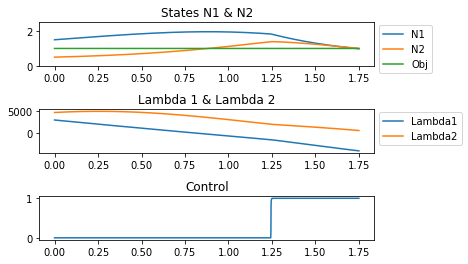

In [6]:
#Gráfico dos valores de N1, N2, lambda1, lambda2 e controle ao longo do tempo
fig = plt.figure()
plt.subplot(3,1,1)
plt.plot(t,n1)
plt.plot(t,n2)
if (alfa2/beta2)==(alfa1/beta1):
    plt.plot(t,(alfa2/beta2)*np.ones(N+1))
else:
    plt.plot(t,(alfa2/beta2)*np.ones(N+1))
    plt.plot(t,(alfa1/beta1)*np.ones(N+1))
if (alfa2/beta2)==(alfa1/beta1):
    plt.legend(["N1","N2","Obj"],bbox_to_anchor=(1, 1.05))
else:
    plt.legend(["N1","N2","Obj1","Obj2"],bbox_to_anchor=(1, 1.05))
plt.ylim((0, np.ceil(max(max(n1),max(n2)))+0.5))
plt.title("States N1 & N2")
plt.subplot(3,1,2)
plt.plot(t,lamb1)
plt.plot(t,lamb2)
plt.legend(["Lambda1","Lambda2"],bbox_to_anchor=(1, 1.05))
plt.title("Lambda 1 & Lambda 2")
plt.subplot(3,1,3)
plt.plot(t,u)
plt.title("Control")
plt.subplots_adjust(hspace=1)

fig.savefig("figure1.pdf", bbox_inches='tight')

finalDistance = (n1[-1]-alfa2/beta2)**2 + (n2[-1]-alfa1/beta1)**2
print(finalDistance)

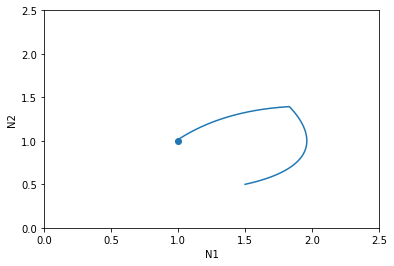

In [7]:
#Gráfico da população ao longo do tempo
fig = plt.figure()
plt.plot(n1,n2)
plt.scatter(beta2/alfa2,beta1/alfa1)
plt.xlabel("N1")
plt.ylabel("N2")
plt.xlim((0, np.ceil(max(n1))+0.5))
plt.ylim((0, np.ceil(max(n2))+0.5))

fig.savefig("figure2.pdf", bbox_inches='tight')